<a href="https://colab.research.google.com/github/rtan01/Group1Project1/blob/main/SCRIPTS/ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Import data
var_list = ['prochoic', 'partyid', 'year', 'age', 'income', 'polviews', 'relig', 'region', 'abany', 'prolife', 'sex']


output_file = 'gss_data_url.csv'
modes = ['w', 'a']
phase = 0


for k in range(3):
    url = f'https://github.com/DS3001/project_gss/raw/main/gss_chunk_{k+1}.parquet'
    df = pd.read_parquet(url, columns=var_list)
    header = True if phase == 0 else False
    df.to_csv(output_file, mode=modes[phase], header=header, index=False)

    phase = 1


In [11]:
df = pd.read_csv(output_file)
df = df[df['year'] == 2021]
df.shape[0]
df = df.dropna(subset=variables)


In [12]:
variables = ['prochoic', 'partyid', 'year', 'age', 'income', 'polviews', 'relig', 'region', 'abany', 'prolife', 'sex']

# Print variable types
print("Variable Types:")
print(df[variables].dtypes)

# Analyzing unique response codes for each variable
print("\nUnique Response Codes:")
for var in variables:
    unique_values = df[var].unique()
    print(f"{var}: {unique_values}")


Variable Types:
prochoic     object
partyid      object
year          int64
age         float64
income       object
polviews     object
relig        object
region       object
abany        object
prolife      object
sex          object
dtype: object

Unique Response Codes:
prochoic: ['strongly agree' 'disagree' 'agree' 'neither agree nor disagree'
 'strongly disagree']
partyid: ['independent, close to democrat' 'not very strong republican'
 'strong democrat' 'other party' 'independent (neither, no response)'
 'not very strong democrat' 'independent, close to republican'
 'strong republican']
year: [2021]
age: [61. 23. 20. 33. 43. 44. 30. 52. 62. 24. 57. 31. 82. 42. 63. 41. 66. 79.
 38. 68. 71. 89. 28. 37. 87. 74. 45. 36. 32. 70. 78. 46. 67. 47. 60. 64.
 34. 53. 48. 25. 65. 29. 69. 39. 59. 75. 49. 27. 73. 51. 26. 22. 50. 55.
 72. 40. 56. 80. 35. 76. 84. 81. 85. 77. 58. 54. 21. 83. 19. 86. 88.]
income: ['$8,000 to $9,999' '$25,000 or more' '$20,000 to $24,999'
 '$10,000 to $14,999' '$1,0

In [23]:
#Perdictive model libary
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [28]:
#Format data for Decision Tree for prochoic
X = df[['partyid', 'year', 'age', 'income', 'polviews', 'relig', 'region', 'abany', 'sex']]
y = df['prochoic']

# One-hot encode the categorical variables
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


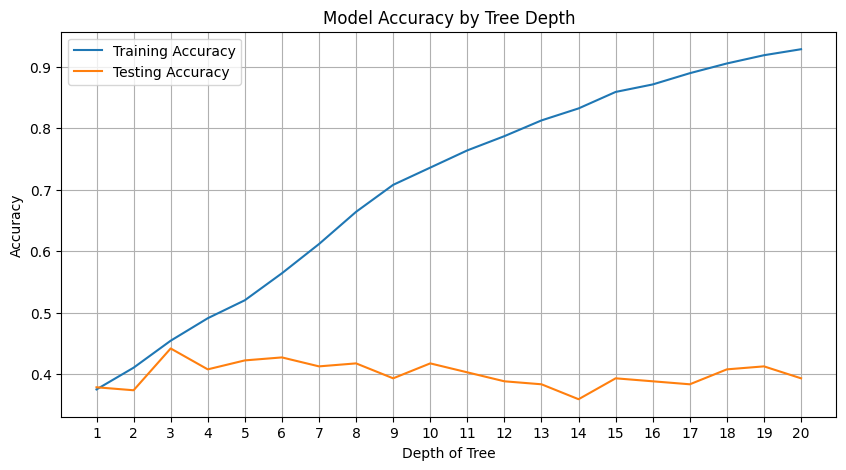

Highest accuracy max_depth: 3


In [29]:
#Finding the Best max_depth for the Decision Tree

train_accuracies = []
test_accuracies = []


for depth in range(1, 21):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    train_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, model.predict(X_test)))

# Plot the training and testing accuracies
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 21), test_accuracies, label='Testing Accuracy')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy by Tree Depth')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

# Determine the depth that yields the highest accuracy on the testing set
best_depth = test_accuracies.index(max(test_accuracies)) + 1
print(f"Highest accuracy max_depth: {best_depth}")

Final model accuracy: 0.441747572815534


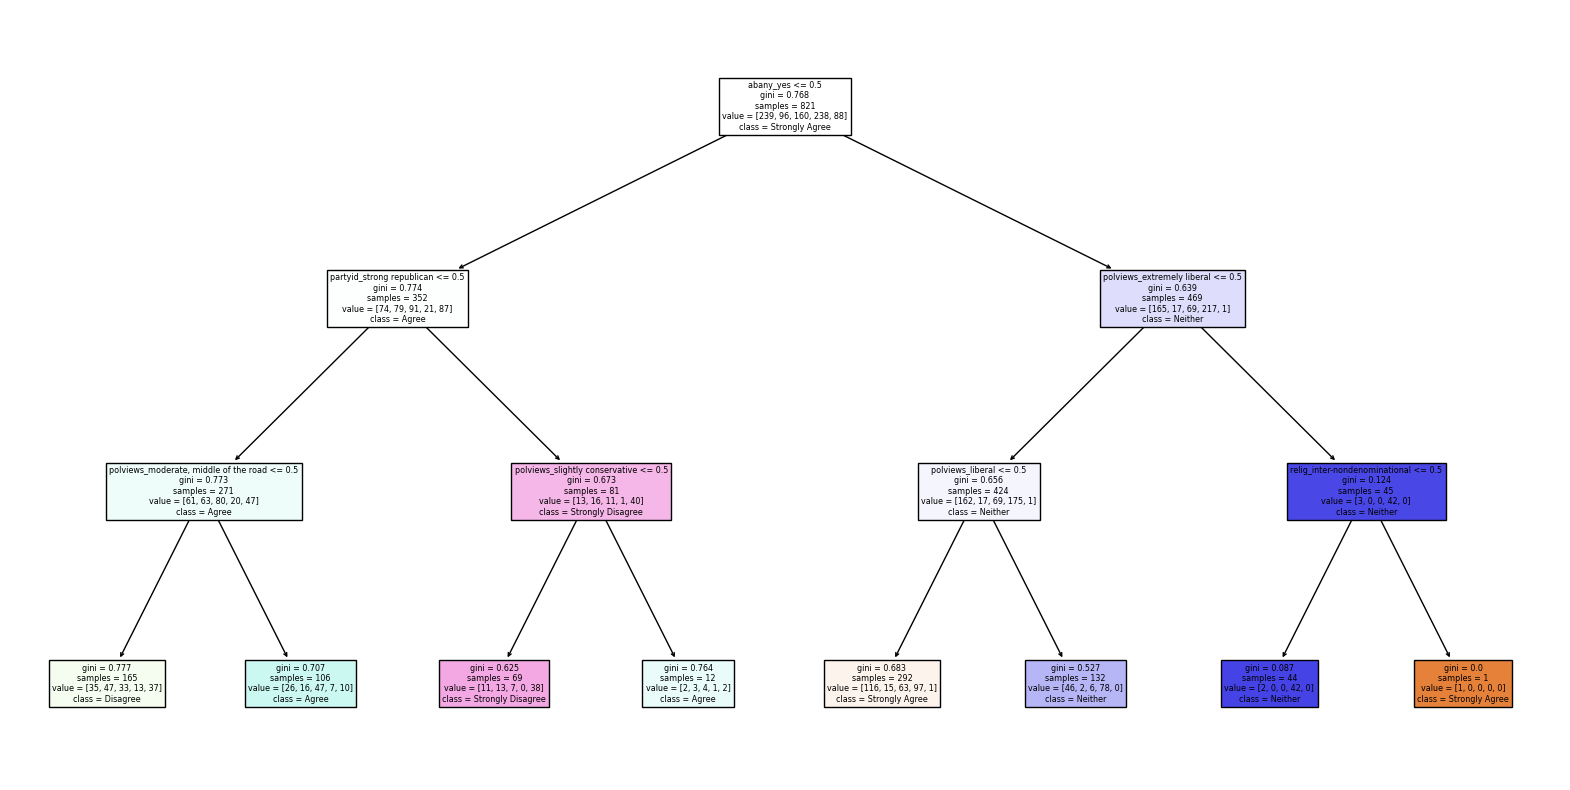

In [30]:
# Training and Evaluating Decision Tree with Optimal Depth

# Decision Tree with optimal depth
model_final = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
model_final.fit(X_train, y_train)

# Predict and evaluate on the test set
y_pred_final = model_final.predict(X_test)
print("Final model accuracy:", accuracy_score(y_test, y_pred_final))

# Visualize the final decision tree
plt.figure(figsize=(20, 10))
plot_tree(model_final, filled=True, feature_names=encoder.get_feature_names_out(), class_names=['Strongly Agree', 'Disagree', 'Agree', 'Neither', 'Strongly Disagree'])
plt.show()

In [34]:
#Format data for Decision Tree for prolife
X = df[['partyid', 'year', 'age', 'income', 'polviews', 'relig', 'region', 'abany', 'sex']]
y = df['prolife']

# One-hot encode
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

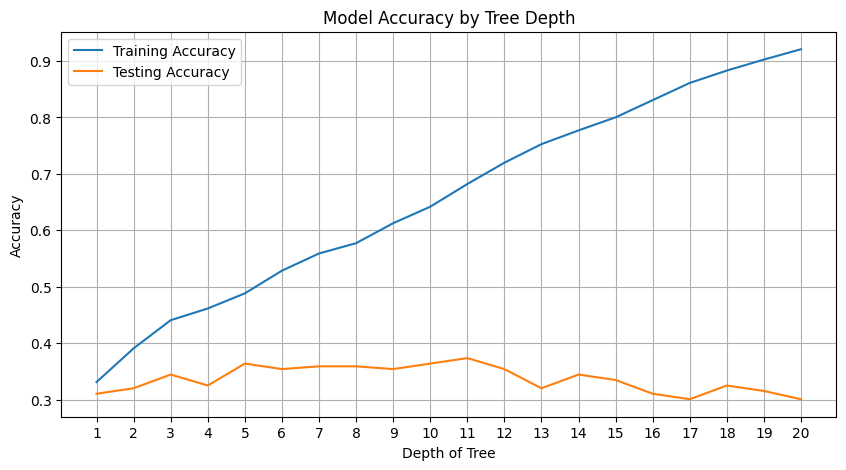

Highest accuracy max_depth: 11


In [37]:
#Finding the Best max_depth for the Decision Tree

train_accuracies = []
test_accuracies = []


for depth in range(1, 21):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    train_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, model.predict(X_test)))


# Plot the training and testing accuracies
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 21), test_accuracies, label='Testing Accuracy')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy by Tree Depth')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

# Determine the depth that yields the highest accuracy on the testing set
best_depth = test_accuracies.index(max(test_accuracies)) + 1
print(f"Highest accuracy max_depth: {best_depth}")

Final model accuracy: 0.3737864077669903


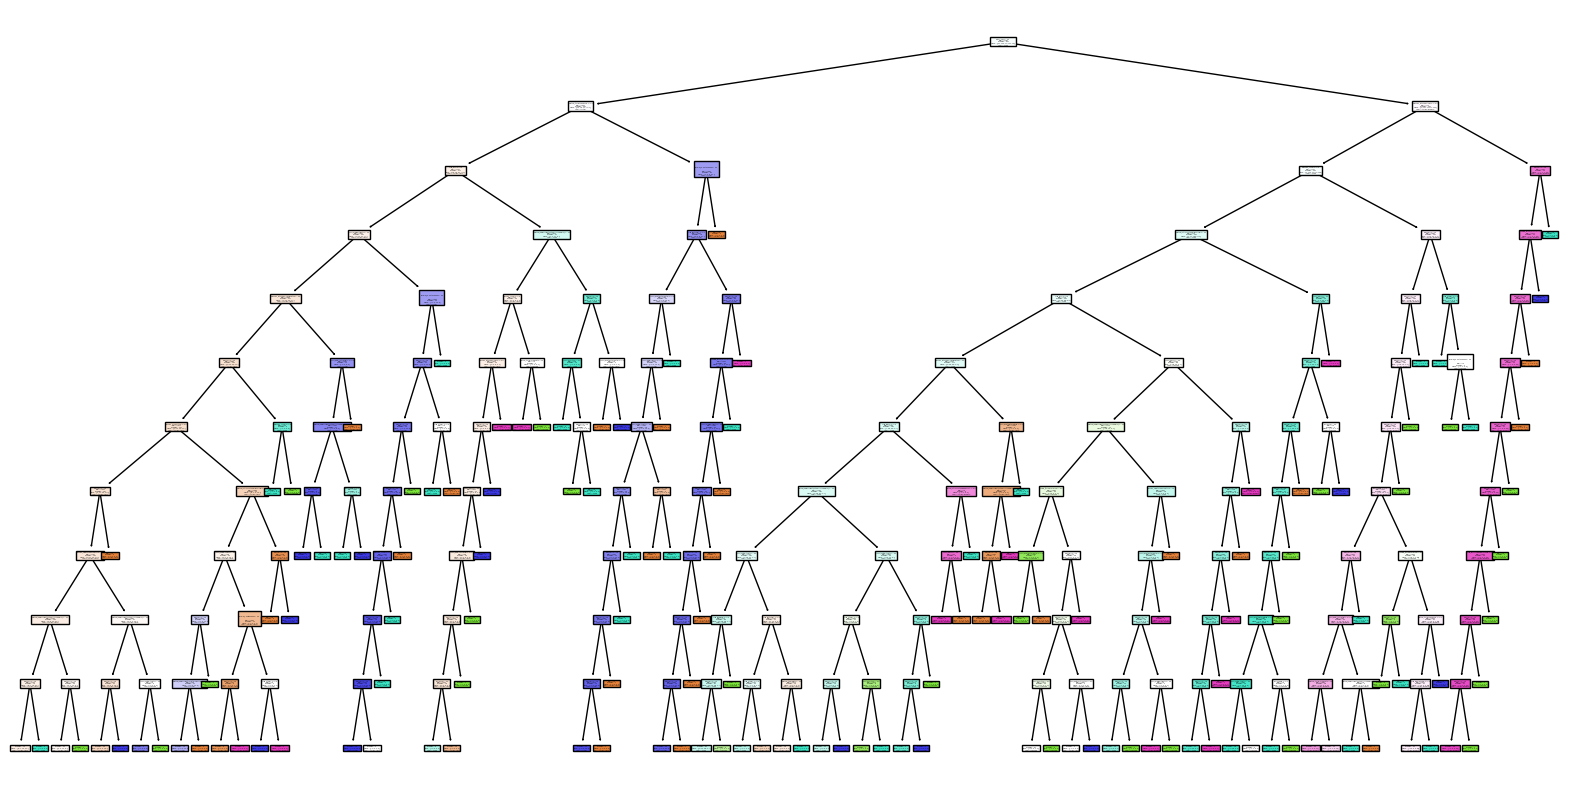

In [36]:
# Training and Evaluating Decision Tree with Optimal Depth

# Decision Tree with optimal depth
model_final = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
model_final.fit(X_train, y_train)

# Predict and evaluate on the test set
y_pred_final = model_final.predict(X_test)
print("Final model accuracy:", accuracy_score(y_test, y_pred_final))

# Visualize the final decision tree
plt.figure(figsize=(20, 10))
plot_tree(model_final, filled=True, feature_names=encoder.get_feature_names_out(), class_names=['Strongly Agree', 'Disagree', 'Agree', 'Neither', 'Strongly Disagree'])
plt.show()

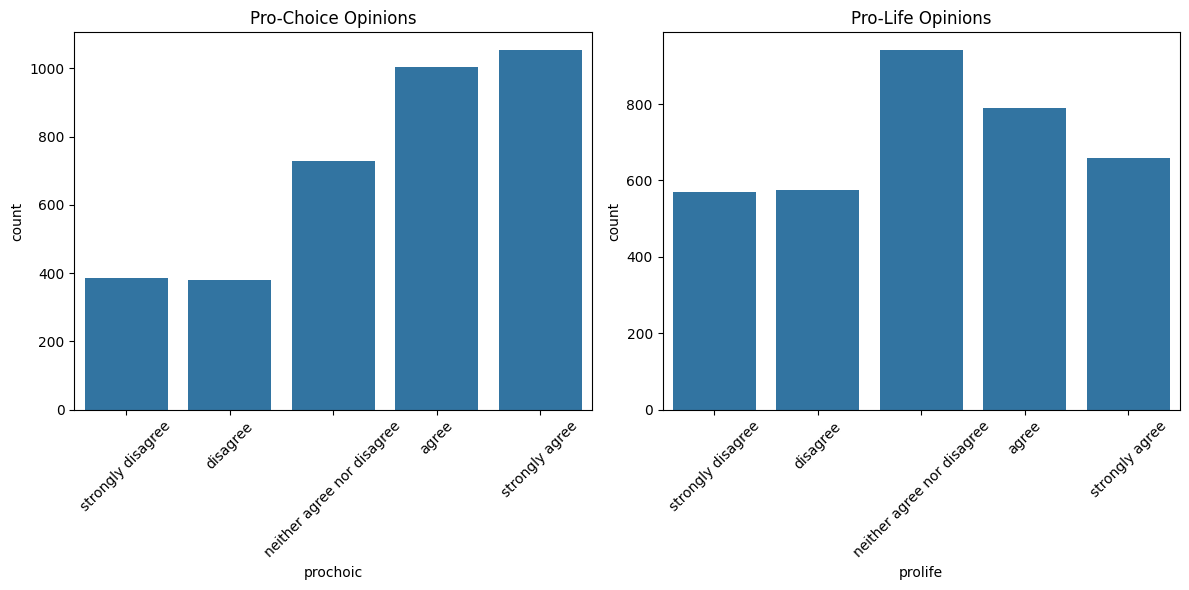

In [ ]:
# Distribution of prochoic and prolife Opinions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='prochoic', data=df, order=['strongly disagree', 'disagree', 'neither agree nor disagree', 'agree', 'strongly agree'])
plt.title('Pro-Choice Opinions')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='prolife', data=df, order=['strongly disagree', 'disagree', 'neither agree nor disagree', 'agree', 'strongly agree'])
plt.title('Pro-Life Opinions')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

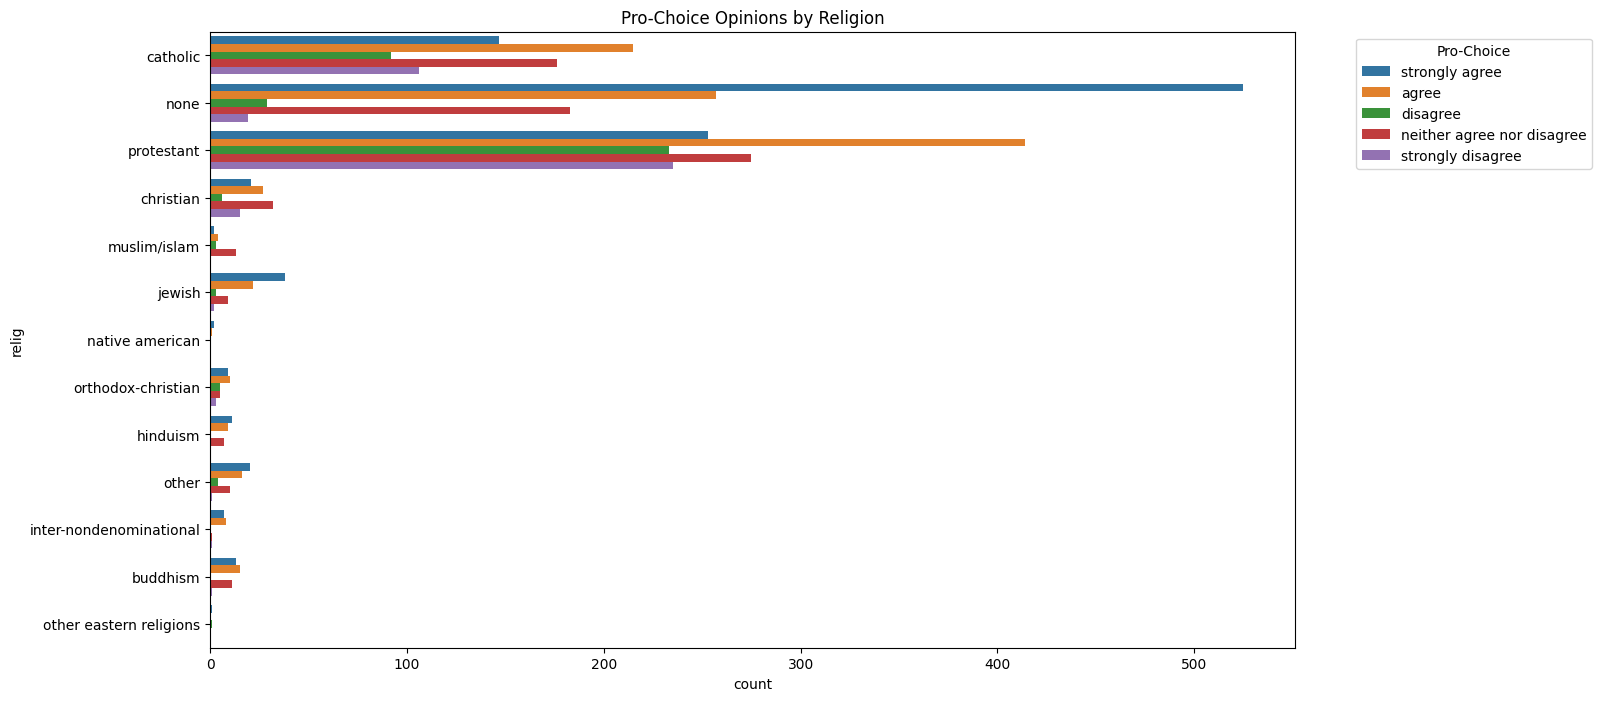

In [ ]:
#Opinions by Religion
plt.figure(figsize=(14, 8))
sns.countplot(y='relig', hue='prochoic', data=df)
plt.title('Pro-Choice Opinions by Religion')
plt.legend(title='Pro-Choice', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

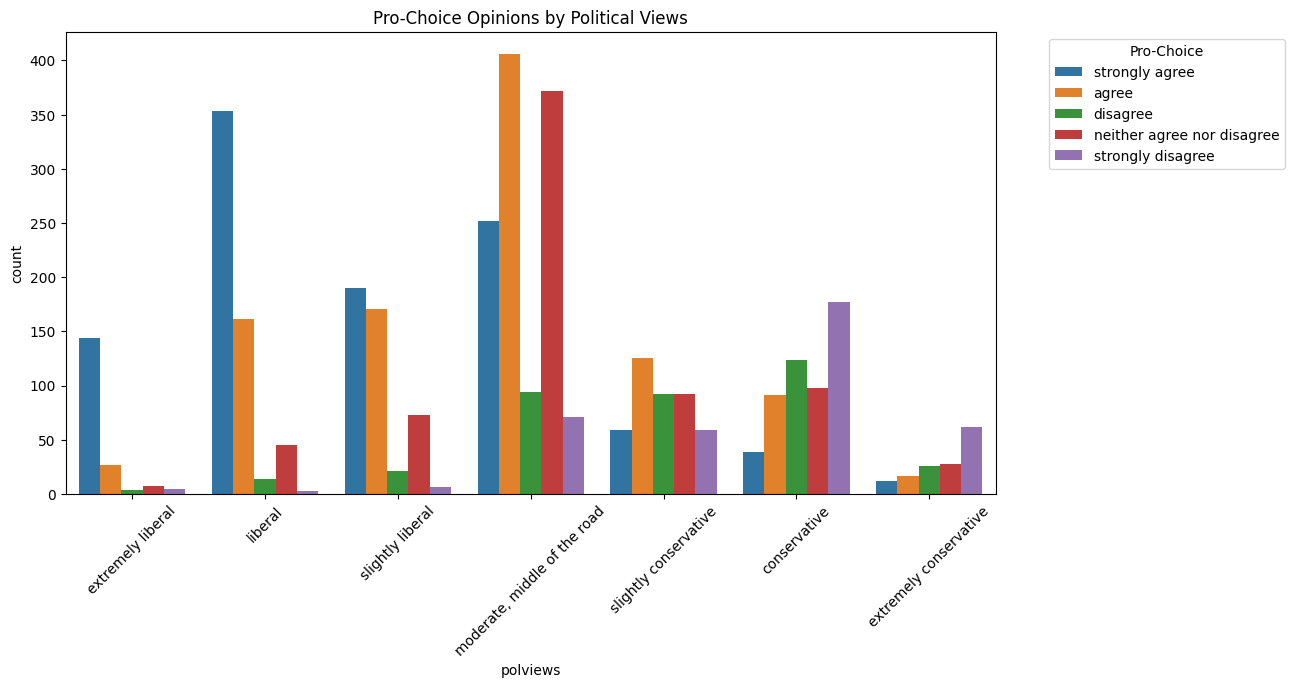

In [ ]:
#Opinions by Political Views
plt.figure(figsize=(12, 6))
sns.countplot(x='polviews', hue='prochoic', data=df, order=['extremely liberal', 'liberal', 'slightly liberal', 'moderate, middle of the road', 'slightly conservative', 'conservative', 'extremely conservative'])
plt.title('Pro-Choice Opinions by Political Views')
plt.xticks(rotation=45)
plt.legend(title='Pro-Choice', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

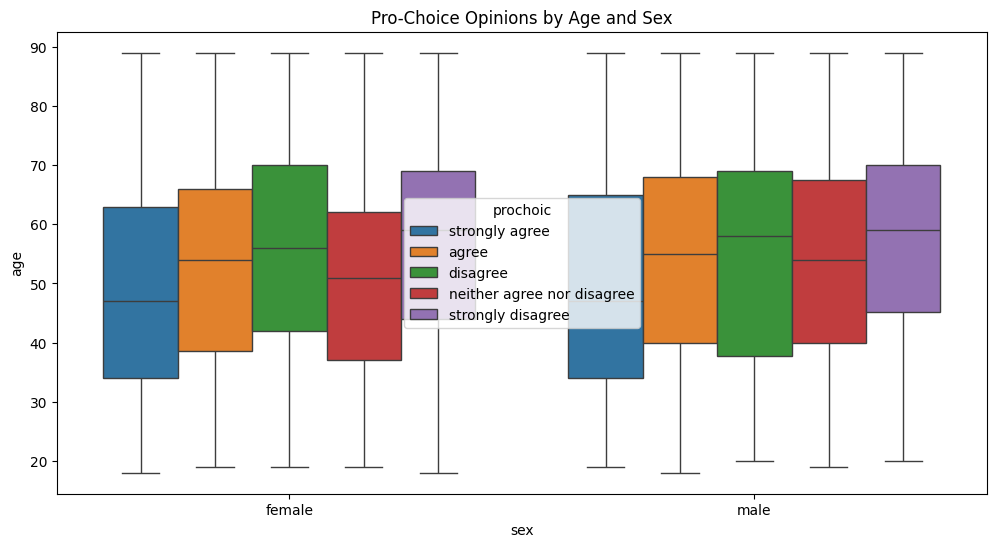

In [ ]:
#Opinions by Age and Sex
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='age', hue='prochoic', data=df)
plt.title('Pro-Choice Opinions by Age and Sex')
plt.show()


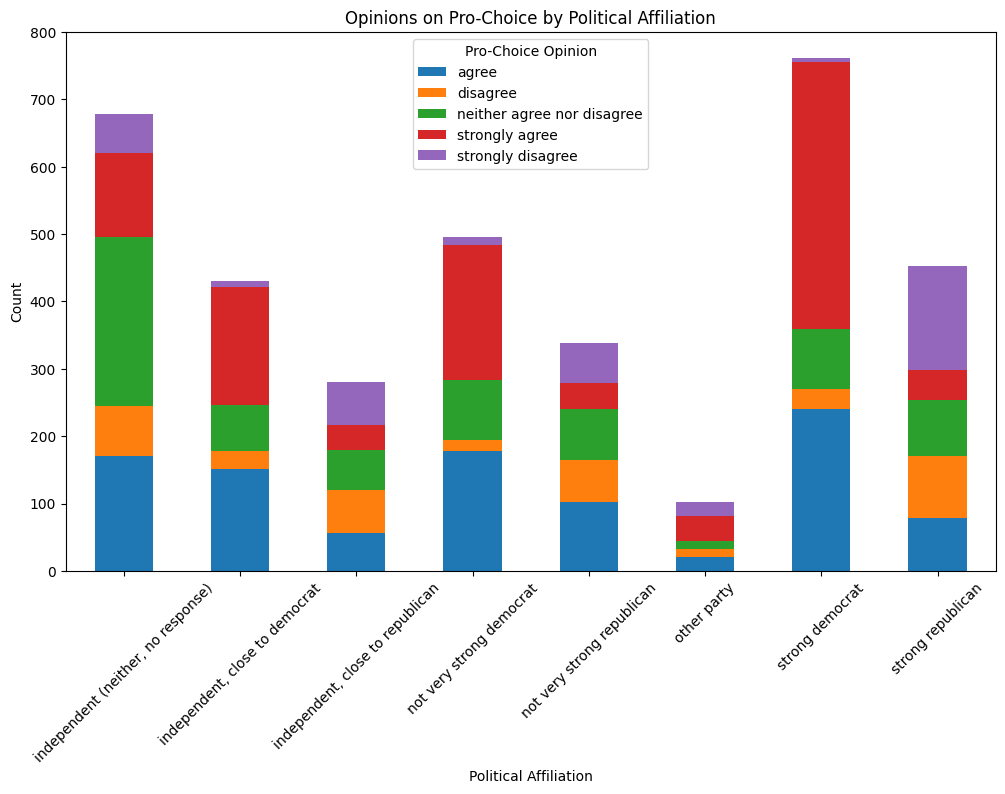

In [ ]:
partyid_prochoic = pd.crosstab(df['partyid'], df['prochoic'])
partyid_prochoic.plot(kind='bar', figsize=(12, 7), stacked=True)
plt.title('Opinions on Pro-Choice by Political Affiliation')
plt.xlabel('Political Affiliation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Pro-Choice Opinion')
plt.show()

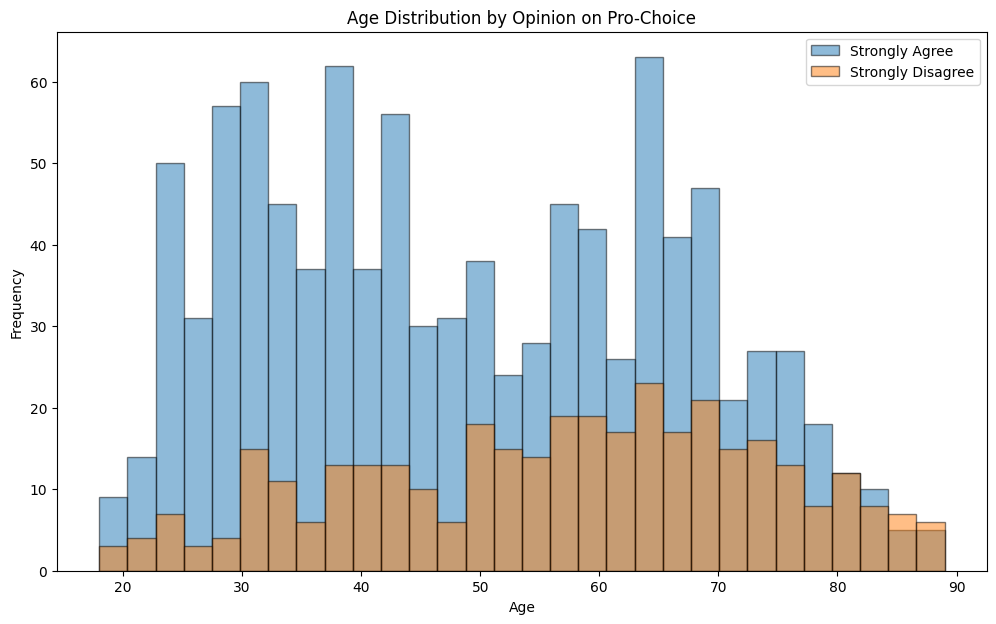

In [ ]:
# Histogram Age Distribution by Opinion on Pro-Choice
agree_df = df[df['prochoic'] == 'strongly agree']['age'].dropna()
disagree_df = df[df['prochoic'] == 'strongly disagree']['age'].dropna()
plt.figure(figsize=(12, 7))

plt.hist(agree_df, bins=30, alpha=0.5, label='Strongly Agree', edgecolor='k')
plt.hist(disagree_df, bins=30, alpha=0.5, label='Strongly Disagree', edgecolor='k')

plt.title('Age Distribution by Opinion on Pro-Choice')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

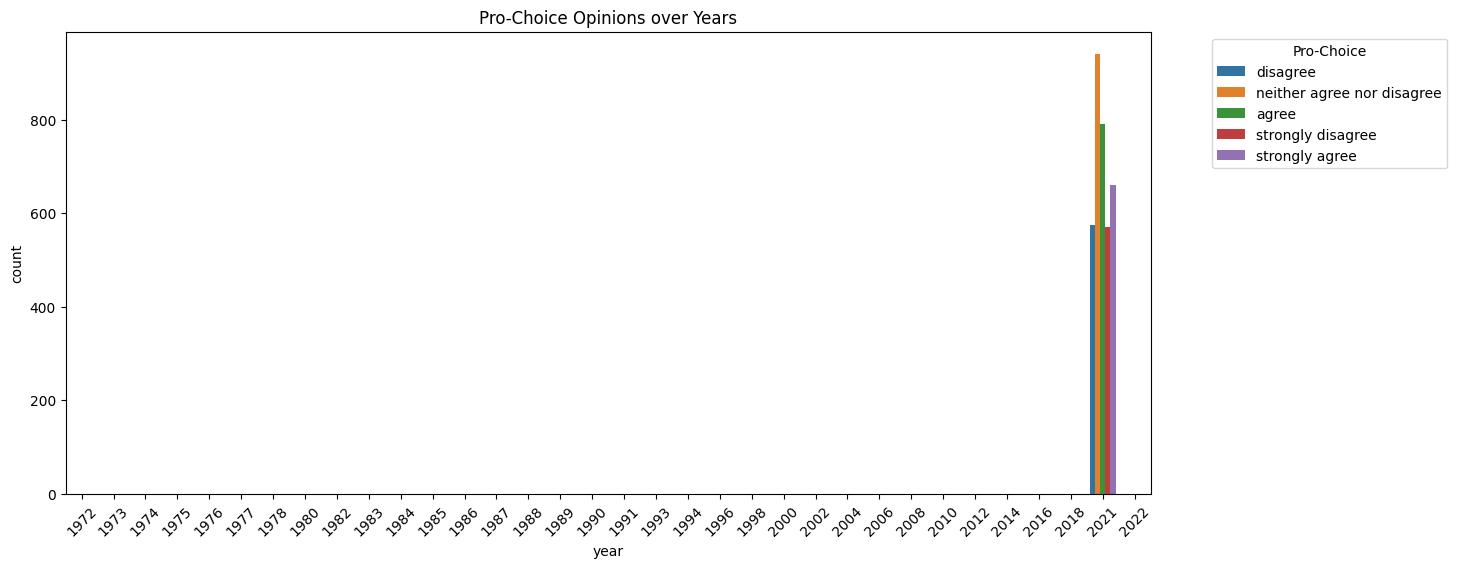

In [ ]:
#Opinions by Year
plt.figure(figsize=(14, 6))
sns.countplot(x='year', hue='prolife', data=df)
plt.title('Pro-Choice Opinions over Years')
plt.xticks(rotation=45)
plt.legend(title='Pro-Choice', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()